In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib as ml
import scipy as sc
import matplotlib as mp


In [2]:
#imports to set file paths

import os
import sys
#os.environ["PYSPARK_PYTHON"] = "/opt/continuum/anaconda/bin/python"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/usr/local/spark-2.4.5-bin-hadoop2.7"
os.environ["SPARK_HOME"] = "/home/harry/spark/spark-3.1.2-bin-hadoop3.2"


In [3]:
#import spark


import pyspark
#import numpy as np
from pyspark.sql import SQLContext
from pyspark import SparkContext

In [4]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("trialmridata").getOrCreate()


In [12]:
#creat spark context

sc = SparkContext.getOrCreate()

sqlcontext = SQLContext(sc)

In [14]:
#read dataframe

df = sqlcontext.read.options(header = 'true',  inferSchema='True', delimiter=',').csv('/home/harry/temple_job/data/t1w.csv')

In [15]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _created.$date: timestamp (nullable = true)
 |-- _etag: string (nullable = true)
 |-- _id.$oid: string (nullable = true)
 |-- _updated.$date: timestamp (nullable = true)
 |-- bids_meta.modality: string (nullable = true)
 |-- bids_meta.subject_id: string (nullable = true)
 |-- cjv: double (nullable = true)
 |-- cnr: double (nullable = true)
 |-- efc: double (nullable = true)
 |-- fber: double (nullable = true)
 |-- fwhm_avg: double (nullable = true)
 |-- fwhm_x: double (nullable = true)
 |-- fwhm_y: double (nullable = true)
 |-- fwhm_z: double (nullable = true)
 |-- icvs_csf: double (nullable = true)
 |-- icvs_gm: double (nullable = true)
 |-- icvs_wm: double (nullable = true)
 |-- inu_med: double (nullable = true)
 |-- inu_range: double (nullable = true)
 |-- provenance.md5sum: string (nullable = true)
 |-- provenance.settings.testing: boolean (nullable = true)
 |-- provenance.software: string (nullable = true)
 |-- provenance.version: stri

In [16]:
df.schema.names

['_c0',
 '_created.$date',
 '_etag',
 '_id.$oid',
 '_updated.$date',
 'bids_meta.modality',
 'bids_meta.subject_id',
 'cjv',
 'cnr',
 'efc',
 'fber',
 'fwhm_avg',
 'fwhm_x',
 'fwhm_y',
 'fwhm_z',
 'icvs_csf',
 'icvs_gm',
 'icvs_wm',
 'inu_med',
 'inu_range',
 'provenance.md5sum',
 'provenance.settings.testing',
 'provenance.software',
 'provenance.version',
 'qi_1',
 'qi_2',
 'rpve_csf',
 'rpve_gm',
 'rpve_wm',
 'size_x',
 'size_y',
 'size_z',
 'snr_csf',
 'snr_gm',
 'snr_total',
 'snr_wm',
 'snrd_csf',
 'snrd_gm',
 'snrd_total',
 'snrd_wm',
 'spacing_x',
 'spacing_y',
 'spacing_z',
 'summary_bg_k',
 'summary_bg_mad',
 'summary_bg_mean',
 'summary_bg_median',
 'summary_bg_n',
 'summary_bg_p05',
 'summary_bg_p95',
 'summary_bg_stdv',
 'summary_csf_k',
 'summary_csf_mad',
 'summary_csf_mean',
 'summary_csf_median',
 'summary_csf_n',
 'summary_csf_p05',
 'summary_csf_p95',
 'summary_csf_stdv',
 'summary_gm_k',
 'summary_gm_mad',
 'summary_gm_mean',
 'summary_gm_median',
 'summary_gm_n',
 

In [17]:
#make a reduced size dataframe



#df2 = df.select("_etag", "cjv", 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z')

df2 = df.select("_etag", "cjv", 'fwhm_x', 'fwhm_y', 'fwhm_z')


df2.createOrReplaceTempView("df2")

In [18]:
df2.show()

+--------------------+-------------------+-----------------+-------+-------+
|               _etag|                cjv|           fwhm_x| fwhm_y| fwhm_z|
+--------------------+-------------------+-----------------+-------+-------+
|e977337639152e97d...| 0.3025424913077421|3.425481743936501|3.65108|3.31968|
|c08b2262355c1f24f...|0.32524912670057027|          4.11736|4.36596|3.87289|
|128a6874f0d1fe67d...|0.32329039263902604|          4.10502|4.43056|3.99232|
|40e9c3be3b4f046c7...|0.29096741151848815|          4.00096|4.41971|3.82058|
|b3f60316a76c4fa86...| 0.3182414090121235|          4.02026|4.45114|3.82944|
|377131abf51e45438...| 0.3519450878591101|           3.8633|4.17255|3.61909|
|e68c9a4be2c515901...| 0.3375293687856352|          3.90992|4.26888|3.96854|
|5fa768506055e3f1d...|0.33454299433876794|          3.75091|4.10736|3.51794|
|197467255ec2bfb5e...| 0.2957426800953754|          4.13385|4.40638|3.90996|
|051ffe7436ee4f225...|0.37228283655505506|          3.82576| 4.2721|3.75623|

In [19]:
df2.count()

1032817

In [20]:
df2.na.drop().count()

1032817

In [23]:
#test that we can analyze the set

df2.groupBy().sum("cjv").show()

+------------------+
|          sum(cjv)|
+------------------+
|449374.71782270906|
+------------------+



In [24]:
#make assembled vector suitable for ml in spark

from pyspark.ml.feature import VectorAssembler

#vectorAssembler = VectorAssembler(inputCols = ['cjv', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z'], outputCol = 'features')

vectorAssembler = VectorAssembler(inputCols = ['cjv', 'fwhm_x', 'fwhm_y', 'fwhm_z'], outputCol = 'features')


In [25]:
#make transformed dataframe. "features" is the column of interest

cdf = vectorAssembler.transform(df2)

In [26]:
cdf.show()

+--------------------+-------------------+-----------------+-------+-------+--------------------+
|               _etag|                cjv|           fwhm_x| fwhm_y| fwhm_z|            features|
+--------------------+-------------------+-----------------+-------+-------+--------------------+
|e977337639152e97d...| 0.3025424913077421|3.425481743936501|3.65108|3.31968|[0.30254249130774...|
|c08b2262355c1f24f...|0.32524912670057027|          4.11736|4.36596|3.87289|[0.32524912670057...|
|128a6874f0d1fe67d...|0.32329039263902604|          4.10502|4.43056|3.99232|[0.32329039263902...|
|40e9c3be3b4f046c7...|0.29096741151848815|          4.00096|4.41971|3.82058|[0.29096741151848...|
|b3f60316a76c4fa86...| 0.3182414090121235|          4.02026|4.45114|3.82944|[0.31824140901212...|
|377131abf51e45438...| 0.3519450878591101|           3.8633|4.17255|3.61909|[0.35194508785911...|
|e68c9a4be2c515901...| 0.3375293687856352|          3.90992|4.26888|3.96854|[0.33752936878563...|
|5fa768506055e3f1d..

In [27]:
#do a kmeans clustering.

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = cdf

# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.9999810147319063
Cluster Centers: 
[0.43509673 3.35286254 3.73321873 3.40962404]
[4.19765203e-01 2.05555636e+00 4.82267177e+03 2.55626090e+00]
[4.41236295e-01 1.92571950e+00 2.29711832e+00 4.82266868e+03]


In [48]:
cents = [c for c in centers]
cen = np.array(list(zip(cents[0],cents[1],cents[2])))

In [49]:
print(cen)

[[4.35096728e-01 4.19765203e-01 4.41236295e-01]
 [3.35286254e+00 2.05555636e+00 1.92571950e+00]
 [3.73321873e+00 4.82267177e+03 2.29711832e+00]
 [3.40962404e+00 2.55626090e+00 4.82266868e+03]]


In [51]:
#plot results.

import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import numpy as np



def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap,label='Test')
    plt.show()



<ipython-input-51-00eb6e3748ab>:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


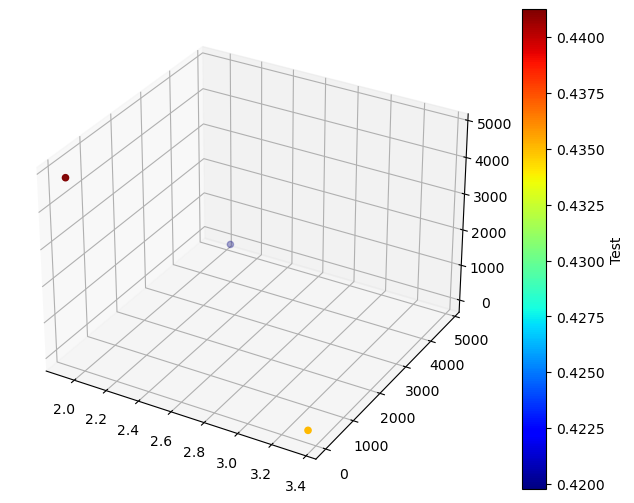

In [53]:


scatter3d(cen[1], cen[2], cen[3] ,cen[0])